# 10. GRADUATE SCHOOL ADMISSIONS: LOGISTIC REGRESSION
---

## 1. Introducing the Data

We'll be working with a dataset containing data on 644 applicants (college graduates applying to graduate schools) with the following columns:

- `gre` - applicant's score on the Graduate Record Exam, a generalized test for prospective graduate students.
    - score ranges from 200 to 800.
- `gpa` - college grade point average.
    - continuous data between 0.0 and 4.0.
- `admit` - binary value
    - binary value, 0 or 1, where 
        - 1 means the applicant was admitted to the program and 
        - 0 means the applicant was rejected.

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

admissions = pd.read_csv('admissions.csv')
print(admissions.shape)
admissions.head()

(644, 3)


,admit,gpa,gre
0,0,3.177,594.103
1,0,3.413,631.529
2,0,2.728,553.714
3,0,3.094,551.090
4,0,3.142,537.185


## 2. Train-Test Splitting

In [2]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(admissions, test_size=0.2, random_state=42)
print(train.shape, test.shape)

(515, 3) (129, 3)


## 3. Visualizing Data

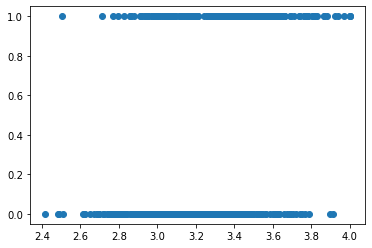

In [3]:
import matplotlib.pyplot as plt

plt.scatter(train['gpa'], train['admit'])
plt.show()

## 4. Understanding the Logistic Function
- The mathematical representation of the logistic function:
$$
\sigma(t) = \frac{e^t}{1+e^t}
$$
- The function is broken up into 2 key parts:
    - $e^t$: the exponential transformation, making all values positive
    - $\frac{t}{1+t}$: the normalization transformation, making all values range between 0 and 1
    
#### i. Plotting the exponential part

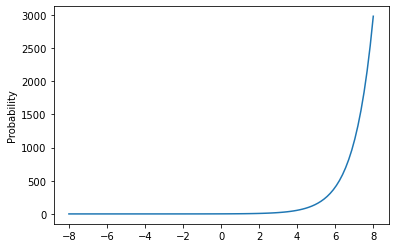

In [4]:
def exponent(x):
    return np.exp(x)

x = np.linspace(-8,8,100)
y = exponent(x)

plt.plot(x,y)
plt.ylabel('Probability')
plt.show()

#### ii. Plotting the normalization part

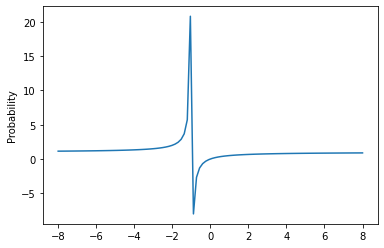

In [5]:
def normalizer(x):
    return x / (1 + x)

x = np.linspace(-8,8,100)
y = normalizer(x)

plt.plot(x,y)
plt.ylabel('Probability')
plt.show()

#### iii. Plotting the logistic function

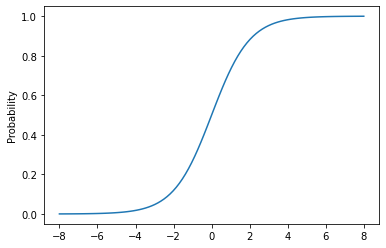

In [6]:
def logistic(x):
    return np.exp(x) / (1 + np.exp(x))

x = np.linspace(-8,8,100)
y = logistic(x)

plt.plot(x,y)
plt.ylabel('Probability')
plt.show()

## 5. Training a Logistic Regression Model

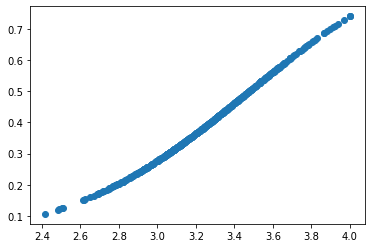

In [7]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(train[["gpa"]], train["admit"])

pred_probs = logistic_model.predict_proba(train[["gpa"]])
plt.scatter(train["gpa"], pred_probs[:,1])
# probability that the row belongs to lable 1

You'll notice that the scatter plot suggests a linear relationship between the gpa values and the probability of being admitted. This is because logistic regression is really just an adapted version of linear regression for classification problems. `Both logistic and linear regression are used to capture linear relationships` between the independent variables and the dependent variable.

Let's now use the `predict` method to return the label predictions for each row in our training dataset.
## 6. Predicting Labels

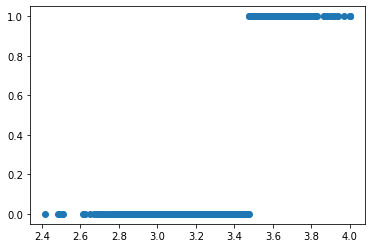

In [8]:
fitted_labels = logistic_model.predict(train[["gpa"]])
plt.scatter(train["gpa"], fitted_labels)